## Lecture 19 EEP118

General Multi Year Panel Data

Assumptions for Fixed Effect (FE) Model

Policy analysis with Panel Data



End chapter 13. Read 14.1

See R code on bcourses and also notebook in datahub for this lecture

Daily Assignment 19 posted as well as solutions

Pset 4 posted see due date in bcourses Pset 5 posted soon



Last class, with a panel of 46 cities and two years of data, 82 and 87, we estimated the following model
𝑐𝑟𝑖𝑚𝑒𝑟𝑎𝑡𝑒_𝑖𝑡= 𝛼_𝑖 + 𝛽_1  𝑢𝑛𝑒𝑚_𝑖𝑡 +𝛽_2  𝑑87 + 𝑣_𝑖𝑡


𝛽_1  = controlling for all the characteristics of the cities that do not vary over time (𝛼_𝑖  fixed effects ) and for the general effect of time common to all cities (d87) a one percent point increase in unemployment induces a 𝛽_1  increase in crime rate (number crimes per 100 people)


we used Lecture18_CRIME2 .dta   

and estimated a model

reg6n <- lm(crmrte ~ unem + d87+ +offarea+lawexpc+pcinc+factor(city) , data = mydata) 
summary(reg6n)

How did we interpret beta hat for unemployment?

Controlling for all constant characteristics of cities (that do not vary over time) =city fixed effects, and for effect of time (dummy for year 87) that captures changes in 1987 relative to 1982 factors that affect crime rate that are common to all cities,  and controlling for officer per area, law espenditures, per capita income,
a 1 percentage point increase in
 unemployment rate  induces a significant
 2.932 per thousand increase in crime rate 





Last lecture we had two years of data

Generalizing to many years is mechanically very easy and will open the door to many new analyses

Illustration of multi-year panel data analysis: 

# We will measure the impact of Enterprise Zones (EZ) on employment


Data: 22 cities in Indiana, from 1980 to 1988
22 cities and many years of data

Multi-year panel data:  Impact of enterprise zones on employment
Source:  data file EZUNEM (Wooldridge). 22 cities in Indiana, from 1980 to 1988


Six city enterprise zones created in 1984, and 4 more city EZ created in 1985.



In [1]:
# Load the 'pacman' package
library(pacman) 
#packages to use load them now using the pacman "manager"
p_load(dplyr, haven, readr) 
#Another great feature of p_load(): if you try to load a package that is not installed on your machine, p_load() install the package for you, rather than throwing an error. For instance, let’s install and load one final package named ggplot2. 
p_load(ggplot2)


pacman::p_load(lfe, lmtest, haven, sandwich, tidyverse)
# lfe for running fixed effects regression
# lmtest for displaying robust SE in output table
# haven for loading in dta files
# sandwich for producing robust Var-Cov matrix
# tidyverse for manipulating data and producing plots


#change into Lecture 19 directory
#setwd("/Users/sofiavillas-boas/Dropbox/EEP118_Spring2023/Lectures/Lecture19")


pacman::p_load(lfe, haven, tidyverse)




In [2]:

#read in a Stata dataset DATA LECTURE 19
mydata <- read_dta("Lecture19_ezunem.dta")
head(mydata)

#when did city 1 get an EZ?

year,uclms,ez,d81,d82,d83,d84,d85,d86,d87,⋯,c17,c18,c19,c20,c21,c22,luclms,guclms,cez,city
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1980,166746,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,12.02423,NA,NA,1
1981,83561,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,11.33333,-0.69089508,0,1
1982,158146,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,11.97127,0.63794231,0,1
1983,83572,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,11.33346,-0.63781071,0,1
1984,45949,1,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,10.73529,-0.59817600,1,1
1985,48848,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,10.79647,0.06118107,0,1


City 1 got EZ=1 in 1984 onwards, so in 1984

In [3]:
# summarize data
summary(mydata)

      year          uclms              ez              d81        
 Min.   :1980   Min.   : 12360   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1982   1st Qu.: 43922   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1984   Median : 69170   Median :0.0000   Median :0.0000  
 Mean   :1984   Mean   : 95383   Mean   :0.2323   Mean   :0.1111  
 3rd Qu.:1986   3rd Qu.:114443   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :1988   Max.   :667208   Max.   :1.0000   Max.   :1.0000  
                                                                  
      d82              d83              d84              d85        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1111   Mean   :0.1111   Mean   :0.1111   Mean   :0.1111  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000 

We want to estimate the Impact of establishing Enterprise Zones (EZ) on Unemployment

The variable 𝑢𝑐𝑙𝑚𝑠_𝑖𝑡 = Unemployment claims at city i and year t

The variable 𝐸𝑍_𝑖𝑡=0 if no EZ and=1 if there is an EZ in city i at time t

uclms is number of unemployment claims file during the year in a city

year            1980 to 1988

ez              =1 if have enterprise zone, =0 o.w.

city             a city identifier from 1 to 22

What is the number of observations?    9 years times 22 cities = 198

What is the unit of observation?   ->   a city in a year

What percent of observations have EZ=1?   ---> .2323232    


the average of EZ is .2323232   

## Create a graph to let us look at evolution of Total unemployment over time



In [4]:
# first generate sum of claims by year
#The command below creates a column in the original data with sum (over all cities) of unempl claims by year

lec19df <- mydata %>%
  group_by(year) %>%
  mutate(annual_claims = sum(uclms)) %>%
  ungroup

make graph of total (sum over all cities) umemployment claims by year

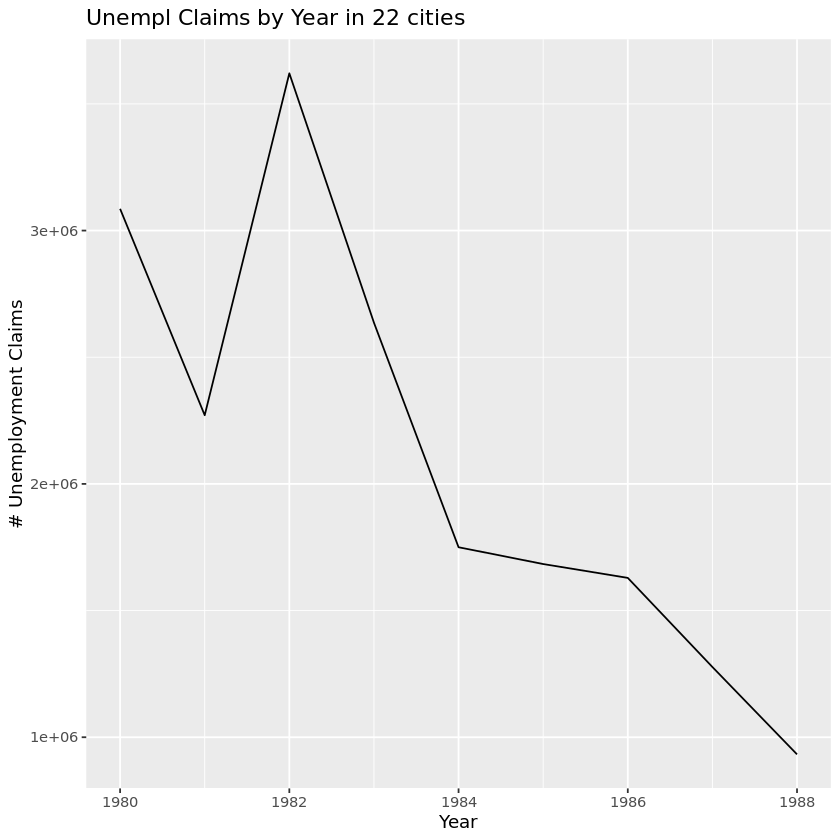

In [5]:
# plot
ggplot(lec19df, aes(x = year, y = annual_claims)) +
  geom_line() +
  labs(title = "Unempl Claims by Year in 22 cities",
       x = "Year",
       y = "# Unemployment Claims")

## Graph Total unemployment claims (Sum of for EZ cities) and then (Sum for non EZ cities) over time


In [6]:
# variables for graph for EZ and non EZ cities
lec19df <- mydata %>%
  group_by(city) %>%
  mutate(cityez = ifelse(max(ez)==1, "EZ", "Non-EZ")) %>%
  group_by(year, cityez) %>%
  mutate(annual_claims_ez = sum(uclms)) %>%
  ungroup()

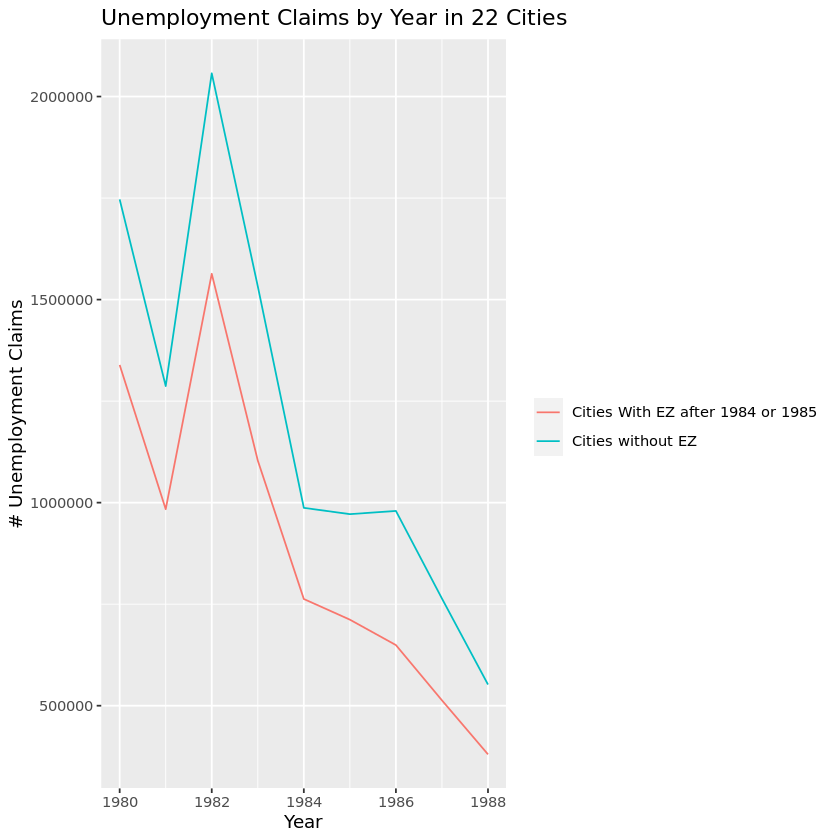

In [7]:
# plot for EZ and non EZ cities
ggplot(lec19df, aes(x = year, y = annual_claims_ez, group = cityez, color = cityez)) +
  geom_line() +
  scale_color_discrete(name="",
                       breaks=c("EZ", "Non-EZ"),
                       labels=c("Cities With EZ after 1984 or 1985", "Cities without EZ")) +
  labs(title = "Unemployment Claims by Year in 22 Cities",
       x = "Year",
       y = "# Unemployment Claims") 

What do you see?

1. A drop in 1982

2. 2. EZ cities always had and have lower unemployment


3. The difference between red line (cities without EZ) and blue line before 1984 had nothing to do with EZ. Since EZ only happens after 1984 for some cities

4.  The switches to EZ are in 1984 and  in 1985


5. The path of the blue line cannot be fully attributed to EZ


The empirical question is :

Does the difference in the two lines increase or decrease when cities adopt EZs?



## Regression

Lets estimate a regression model to investigate whether EZ caused an impact on unemployment


Lets consider the relationship between unemployment and EZ over time and across the 22 cities in the data using T years (T=9 here)


Model- city j  year t

 ln⁡(𝑢𝑐𝑙𝑚𝑠)_𝑗𝑡=  𝛽_1  𝐸𝑍_𝑗𝑡 + {aj } + {𝑑𝑡 } + 𝑣_𝑗𝑡


Unemployment marginal effect: (𝝏 𝒍𝒏(𝒖𝒄𝒍𝒎𝒔))/(𝑬𝒁 𝟎 𝒕𝒐 𝟏)  = 𝛽_1  percent change in unemployment claims, controlling for constant factors by city and factors common to all cities by year, with city fixed effects, and also year fixed effects, respectively.

aj captures all the characteristics of city j that are constant over time and affect unemployment -> that is, it controls for the overall level of unemployment in a city j, a city fixed effect. 

dt captures overall time patterns, year by year, that is the factors changing over time, that change year by year that affect unemployment and that are common to all cities, a year fixed effect. 


Short writing for one dummy for ALL BUT ONE city:  a2,  a3, …,a22.

And one dummy for all but ONE year (d81, d82, …dT)  exclude 1980



For city j in 1980 to 1983 no EZ (EZ=0 for all j and t<1984)

 ln⁡(𝑢𝑐𝑙𝑚𝑠)_𝑗80=𝛽_0+aj +𝑣_𝑗80          in 1980         
 
 --->  constant 𝛽_0  is 1980 (when all   other dyears=0
 
 
 ln⁡(𝑢𝑐𝑙𝑚𝑠)_𝑗81= aj +𝑑81 +𝑣_𝑗81     in 1981

For city j at time t, notation, 

ln⁡(𝑢𝑐𝑙𝑚𝑠)_𝑗𝑡= 𝛽_0+ 𝛽_1  𝐸𝑍_𝑗𝑡_ +aj +𝑑𝑡 +𝑣_𝑗𝑡





In [8]:
#regression in levels
reg1 <- lm(uclms ~ ez, data = lec19df)
summary(reg1)



Call:
lm(formula = uclms ~ ez, data = lec19df)

Residuals:
   Min     1Q Median     3Q    Max 
-94003 -48961 -20850  24958 560845 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   106364       7066  15.052  < 2e-16 ***
ez            -47262      14661  -3.224  0.00148 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 87120 on 196 degrees of freedom
Multiple R-squared:  0.05035,	Adjusted R-squared:  0.04551 
F-statistic: 10.39 on 1 and 196 DF,  p-value: 0.001482


In [9]:

#regression in log unemployment
reg0 <- lm(luclms ~ ez, data = lec19df)
summary(reg0)


Call:
lm(formula = luclms ~ ez, data = lec19df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87835 -0.49217 -0.01882  0.48605  2.11029 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.30057    0.05575 202.685  < 2e-16 ***
ez          -0.47257    0.11567  -4.085 6.41e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6874 on 196 degrees of freedom
Multiple R-squared:  0.07847,	Adjusted R-squared:  0.07377 
F-statistic: 16.69 on 1 and 196 DF,  p-value: 6.411e-05


We see that EZ from 0 to 1 reduced ln of log unemployment claims by -0.47 

Significantly. Or reduced unclms by 47%. Significant at 1% level. p value is p-value: 6.411e-05


## Fixed effects regression

And one dummy for all but ONE year (d81, d82, …dT)  exclude 1980

One dummy for ALL BUT ONE city:  a2,  a3, …,a22.  exclude city1


In [10]:
#reg with fixed effects and log of unemployment claims as Y variable
reg <- lm(luclms ~ ez + factor(year) + factor(city), data = lec19df)
summary(reg)



Call:
lm(formula = luclms ~ ez + factor(year) + factor(city), data = lec19df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57618 -0.10837 -0.00977  0.11364  0.49623 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      11.67615    0.08008 145.807  < 2e-16 ***
ez               -0.10441    0.05542  -1.884 0.061291 .  
factor(year)1981 -0.32163    0.06046  -5.320 3.30e-07 ***
factor(year)1982  0.13550    0.06046   2.241 0.026332 *  
factor(year)1983 -0.21926    0.06046  -3.627 0.000381 ***
factor(year)1984 -0.57915    0.06232  -9.293  < 2e-16 ***
factor(year)1985 -0.59179    0.06550  -9.036 3.92e-16 ***
factor(year)1986 -0.62126    0.06550  -9.486  < 2e-16 ***
factor(year)1987 -0.88895    0.06550 -13.573  < 2e-16 ***
factor(year)1988 -1.22763    0.06550 -18.744  < 2e-16 ***
factor(city)2    -0.19349    0.09941  -1.946 0.053292 .  
factor(city)3    -0.37894    0.09941  -3.812 0.000194 ***
factor(city)4    -0.54118    0.09941  -5.444 1.8

EZ from 0 to 1 reduced log of unemployment claims by -0.10

Significantly. Or reduced unclms by 10%. Significant at 6% level.


what does the intercept estimate mean?

Ln uclms hat for city=1 and 1980

dummy for all but ONE year to take into account annual differences- exclude 1980


One dummy for ALL BUT ONE city exclude city1, to take into account city constant differences




### If we want to control for FE but not necessarily have all the estimates printed out as output, an equivalent command is in R:

In [11]:
#xtreg equivalent using felm
reg2 <- felm(luclms ~ ez | year + city, data = lec19df)
summary(reg2)


Call:
   felm(formula = luclms ~ ez | year + city, data = lec19df) 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57618 -0.10837 -0.00977  0.11364  0.49623 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)  
ez -0.10441    0.05542  -1.884   0.0613 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2005 on 167 degrees of freedom
Multiple R-squared(full model): 0.9332   Adjusted R-squared: 0.9212 
Multiple R-squared(proj model): 0.02081   Adjusted R-squared: -0.1551 
F-statistic(full model):77.75 on 30 and 167 DF, p-value: < 2.2e-16 
F-statistic(proj model):  3.55 on 1 and 167 DF, p-value: 0.06129 



## Make a Table

In [13]:
#make table
#library(stargazer)
#stargazer(list(reg2), type="text",keep.stat=c("n","rsq"))

#the above work in R Studio

# Panel Data Estimates of the Effects of Death Penalty Laws, and Executions on Murder Rates 1960-2000

## Another data set now: 

TODAY, as an example, “Panel Data Estimates of the Effects of Death Penalty Laws on Murder Rates 1960-2000”

Using data from FBI that I collected in March 22, 2017 

To try to perform a Replication of Donohue and Wolfers (2006) analysis



In [14]:
#open data
mydata2 <- read_dta("dataLecture19murder.dta")
head(mydata2)
# summarize data
summary(mydata2)

#with variables to use
#by number of executions

#ex10=1 if ex10>0

#active=legal*ex10

#passive=legal*(ex10==0)


year,state,popul,pc_mur,pc_rob,pc_assa,pc_burg,pc_larc,pc_auto,r_infd,⋯,decade,statdec,regyear,stid,sample_ds,sample_kls,decade_ds,ex10,active,passive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1930,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,193,1,NA,1,NA,NA,1930,1,1,0
1931,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,193,1,NA,1,NA,NA,1930,1,1,0
1932,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,193,1,NA,1,NA,NA,1930,1,1,0
1933,2,NA,NA,NA,NA,NA,NA,NA,NA,⋯,193,1,217,1,NA,NA,1930,1,1,0
1934,2,NA,NA,NA,NA,NA,NA,NA,NA,⋯,193,1,218,1,NA,NA,1930,1,1,0
1935,2,NA,NA,NA,NA,NA,NA,NA,NA,⋯,193,1,219,1,NA,NA,1930,1,1,0


      year          state         popul             pc_mur      
 Min.   :1930   Min.   : 1    Min.   :   96.0   Min.   : 0.000  
 1st Qu.:1948   1st Qu.:13    1st Qu.:  983.5   1st Qu.: 2.900  
 Median :1967   Median :26    Median : 2657.0   Median : 5.400  
 Mean   :1967   Mean   :26    Mean   : 3940.5   Mean   : 6.958  
 3rd Qu.:1986   3rd Qu.:39    3rd Qu.: 4757.5   3rd Qu.: 9.400  
 Max.   :2004   Max.   :51    Max.   :35484.4   Max.   :80.600  
                NA's   :153   NA's   :250       NA's   :322     
     pc_rob          pc_assa          pc_burg          pc_larc      
 Min.   :   0.4   Min.   :   0.5   Min.   :  67.8   Min.   :  59.9  
 1st Qu.:  30.3   1st Qu.:  44.8   1st Qu.: 387.3   1st Qu.: 553.9  
 Median :  67.5   Median : 119.8   Median : 642.5   Median :1151.2  
 Mean   : 101.9   Mean   : 170.3   Mean   : 764.5   Mean   :1499.7  
 3rd Qu.: 126.2   3rd Qu.: 246.9   3rd Qu.:1059.9   3rd Qu.:2394.3  
 Max.   :1635.1   Max.   :1557.6   Max.   :2906.7   Max.   :5372.7

## Run regressions and Make table of results

In [15]:
# death penalty and murders
REG1<-lm(pc_mur~legal,mydata2)
REG2<-felm(pc_mur~legal| state+year+decade_ds, data=mydata2)
REG3<-felm(pc_mur~legal+rpc_inc+ ur+ ipolice+ nonwhite +age15to19 +age20to24 | state+year+decade_ds, data=mydata2)
REG4<-felm(pc_mur~active+ passive| state+year+decade_ds, data=mydata2)
REG5<-felm(pc_mur~active+ passive+rpc_inc+ ur+ ipolice+ nonwhite +age15to19 +age20to24 | state+year+decade_ds, data=mydata2)


In [19]:
#make table
#stargazer(list(REG1,REG2,REG3, REG4, REG5), type="text",keep.stat=c("n","rsq"))



                           Dependent variable:               
             ------------------------------------------------
                                  pc_mur                     
               OLS                     felm                  
               (1)       (2)       (3)       (4)       (5)   
-------------------------------------------------------------
legal        0.903*** -1.945***  -0.100                      
             (0.249)   (0.258)   (0.143)                     
                                                             
rpc_inc                         0.018***            0.016*** 
                                 (0.005)             (0.005) 
                                                             
ur                              -0.099***           -0.106***
                                 (0.032)             (0.032) 
                                                             
ipolice                         -0.00001            -0.00000 
       

Active=1 if legal and there are executions, passive =1 if legal but no executions

 What do you conclude?



## Placebos

In [20]:
#placebo on other murders
PREG1<-felm(pc_mur~active+ passive+rpc_inc+ ur+ ipolice+ nonwhite +age15to19 +age20to24 | state+year+decade_ds, data=mydata2)
PREG2<-felm(violentcrimerate~active+ passive+rpc_inc+ ur+ ipolice+ nonwhite +age15to19 +age20to24 | state+year+decade_ds, data=mydata2)
PREG3<-felm(pc_rob~active+ passive+rpc_inc+ ur+ ipolice+ nonwhite +age15to19 +age20to24 | state+year+decade_ds, data=mydata2)
PREG4<-felm(pc_larc~active+ passive+rpc_inc+ ur+ ipolice+ nonwhite +age15to19 +age20to24 | state+year+decade_ds, data=mydata2)
PREG5<-felm(pc_burg~active+ passive+rpc_inc+ ur+ ipolice+ nonwhite +age15to19 +age20to24 | state+year+decade_ds, data=mydata2)
PREG6<-felm(pc_auto~active+ passive+rpc_inc+ ur+ ipolice+ nonwhite +age15to19 +age20to24 | state+year+decade_ds, data=mydata2)

#make table
stargazer(list(PREG1,PREG2,PREG3, PREG4, PREG5, PREG6), type="text",keep.stat=c("n","rsq"))




                                            Dependent variable:                               
             ---------------------------------------------------------------------------------
              pc_mur   violentcrimerate    pc_rob       pc_larc        pc_burg      pc_auto   
                (1)          (2)            (3)           (4)            (5)          (6)     
----------------------------------------------------------------------------------------------
active       -0.527***     18.579*         -1.501      205.816***      -17.976     47.203***  
              (0.165)      (10.098)       (4.570)       (39.999)      (18.658)      (10.940)  
                                                                                              
passive        0.028        11.167         -3.272      99.714***       -2.860        11.022   
              (0.144)      (8.854)        (4.007)       (34.761)      (16.358)      (9.592)   
                                                 

Even more convincing, show that active legal death penalty has deterrence on murder but not on other crimes (e.g., auto theft) 

## Upcoming Lectures

Learn methods to approach a policy impact analysis like the soda tax

https://news.berkeley.edu/2019/04/02/berkeleys-soda-tax-election-changed-drinking-habits-months-before-prices-went-up/?fbclid=IwAR0NeswpSOdW82qoLZas348ZJpxyQLJ5oF3ZBl0j2pyrG3Olk3rvOKK1v5g


Correlation is not causation , check these crazy spurious correlations:
http://www.tylervigen.com/spurious-correlations

